<a href="https://colab.research.google.com/github/IevgenTs/uoft-ml-3253-assignments/blob/main/module-01-intro-ml/People_Satisfaction_and_GDP_Ievgen's_sand_box.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/levgenTs/uoft-ml-3253-assignments/blob/main/module-01-intro-ml/module_01_gdp_vs_satisfaction.ipynb)


# Predict People Satisfaction Across the Globe

**Objective:**
We would like to build a model that predicts satisfaction score for people of different countries given their country GDP.

\#Note 1: How to enable code completion:

Tools menu ==> click on settings ==> Editor ==> Enable "Automatically trigger code completions"




#Note 2: Instructions to create a copy of this notebook for youtself

You do not have write access to this notebook.

* From Menu bar, Go to File,
* Select "Save a copy in my Drive"
* Navigate to Google Drive
* Find a folder named "Collab Notebook" and open it to find your notebook.
* Rename it and start making changes.

**Note:** If there is any file you should read in your code, make sure you copy the file from instructor folder to your own Gdrive by following below steps:

* Right clicking on the file name
* Select "Make a copy"
* Click on the new file
* Move it to desired folder, preferrably where you have your notebook

# Download Dataset

Download the Better Life Index data (latest edition, currently it is 2017) from the [OECD’s website](http://homl.info/4) as well as stats about GDP per capita from the [IMF’s website](http://homl.info/5). Then you join the tables and sort by GDP per capita.

# Import Dataset to Google Colab

1. Download CSV and XLS files to your computer
2. Upload them to your Google Drive
3. Open the CSV files using Google Sheets so Google will create the dataset in format of Google Sheets
4. You can remove CSV and XLS files from your drive
5. Use the step by step guide from [here](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=vz-jH8T_Uk2c) and scroll down to **" Google Sheets" ** cell to import data into dataframe

NOTE: After creating Google Sheet into your Drive, make sure you are converting Column 2015 to 0.00 format before importing it into Colab  otherwise Google will import it as a string and you will have hard time to clean the data




In [ ]:
#get file from google drive
%%time
!pip install googledrivedownloader #black magic
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id="1l3mLiM15fw9HTYabfOzBh1fjtVWnQd-x",
                                    dest_path="./Better_Life_Index-BLI.xlsx",
                                    unzip=False)

gdd.download_file_from_google_drive(file_id="1Y_kYr7N1aJWuigFhR9QMNHXVRv_zrROT",
                                    dest_path="./WEO_Data.xlsx",
                                    unzip=False)


CPU times: user 456 ms, sys: 48.9 ms, total: 505 ms
Wall time: 14.4 s


In [ ]:
import pandas as pd
from IPython.display import display

#load excel as dataframe
bli = pd.read_excel("/content/Better_Life_Index-BLI.xlsx", sheet_name=0, engine="openpyxl")
display(bli) #inspect if the dataframe is loaded correctly

# Remove rows where inequality has values other than TOT
bli = bli[bli["INEQUALITY"]=="TOT"]
#display(bli)

# Reformat data based on "indicator column"
bli = bli.pivot(index="Country", columns="Indicator", values="Value")
display (bli)

bli["Life satisfaction"].head()
#bli["Life expectancy"].head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0.0,Units,NaN,NaN,4.300000,NaN,NaN
1,AUS,Australia,CG_SENG,Stakeholder engagement for developing regulations,L,Value,TOT,Total,AVSCORE,Average score,0.0,Units,NaN,NaN,2.700000,NaN,NaN
2,AUS,Australia,CG_SENG,Stakeholder engagement for developing regulations,L,Value,MN,Men,AVSCORE,Average score,0.0,Units,NaN,NaN,2.700000,E,Estimated value
3,AUS,Australia,CG_SENG,Stakeholder engagement for developing regulations,L,Value,WMN,Women,AVSCORE,Average score,0.0,Units,NaN,NaN,2.700000,E,Estimated value
4,AUS,Australia,PS_FSAFEN,Feeling safe walking alone at night,L,Value,TOT,Total,PC,Percentage,0.0,Units,NaN,NaN,63.600000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,USA,United States,WL_EWLH,Employees working very long hours,L,Value,WMN,Women,PC,Percentage,0.0,Units,NaN,NaN,6.860000,NaN,NaN
3395,USA,United States,WL_TNOW,Time devoted to leisure and personal care,L,Value,TOT,Total,HOUR,Hours,0.0,Units,NaN,NaN,14.440000,NaN,NaN
3396,USA,United States,WL_TNOW,Time devoted to leisure and personal care,L,Value,MN,Men,HOUR,Hours,0.0,Units,NaN,NaN,14.480000,NaN,NaN
3397,USA,United States,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0.0,Units,NaN,NaN,14.390000,NaN,NaN


Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,1.1,80.0,13.20,72.0,63.6,1.0,33417.0,57462.0,20.0,...,52063.0,94.0,2.3,85.0,2.7,502.0,14.35,91.0,92.0,21.2
Austria,16.0,1.0,85.0,6.78,72.0,80.7,0.4,32544.0,59574.0,21.0,...,48295.0,92.0,1.6,70.0,1.3,492.0,14.55,75.0,93.0,17.1
Belgium,15.0,2.3,75.0,4.31,62.0,70.7,1.0,29968.0,104084.0,21.0,...,49587.0,92.0,2.2,75.0,2.2,503.0,15.77,89.0,84.0,18.2
Brazil,10.0,6.7,49.0,7.15,64.0,37.3,27.6,12227.0,7102.0,20.0,...,14024.0,90.0,0.8,70.0,2.2,395.0,14.45,79.0,72.0,15.9
Canada,7.0,0.2,91.0,3.73,73.0,80.9,1.4,29850.0,85758.0,22.0,...,48403.0,93.0,2.5,88.0,3.0,523.0,14.41,68.0,91.0,16.7
Chile,16.0,9.4,65.0,10.06,62.0,51.1,4.5,16588.0,21409.0,18.0,...,28434.0,84.0,1.9,57.0,1.5,443.0,14.90,49.0,69.0,17.3
Czech Republic,20.0,0.6,93.0,5.77,72.0,68.3,0.8,21103.0,24258.0,24.0,...,23722.0,89.0,1.4,61.0,2.6,491.0,15.06,59.0,87.0,17.3
Denmark,9.0,0.6,81.0,2.20,75.0,83.0,0.7,28950.0,73543.0,24.0,...,52580.0,95.0,1.9,72.0,2.1,504.0,15.87,86.0,94.0,19.7
Estonia,8.0,6.9,89.0,2.69,72.0,67.2,3.1,18665.0,16967.0,18.0,...,23621.0,90.0,1.6,51.0,2.8,524.0,14.90,64.0,82.0,15.8


,Life satisfaction
Country,
Australia,7.3
Austria,7.0
Belgium,6.9
Brazil,6.6
Canada,7.3


In [ ]:
bli[0:5]

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,1.1,80.0,13.20,72.0,63.6,1.0,33417.0,57462.0,20.0,...,52063.0,94.0,2.3,85.0,2.7,502.0,14.35,91.0,92.0,21.2
Austria,16.0,1.0,85.0,6.78,72.0,80.7,0.4,32544.0,59574.0,21.0,...,48295.0,92.0,1.6,70.0,1.3,492.0,14.55,75.0,93.0,17.1
Belgium,15.0,2.3,75.0,4.31,62.0,70.7,1.0,29968.0,104084.0,21.0,...,49587.0,92.0,2.2,75.0,2.2,503.0,15.77,89.0,84.0,18.2
Brazil,10.0,6.7,49.0,7.15,64.0,37.3,27.6,12227.0,7102.0,20.0,...,14024.0,90.0,0.8,70.0,2.2,395.0,14.45,79.0,72.0,15.9
Canada,7.0,0.2,91.0,3.73,73.0,80.9,1.4,29850.0,85758.0,22.0,...,48403.0,93.0,2.5,88.0,3.0,523.0,14.41,68.0,91.0,16.7


In [ ]:
#load excel as dataframe
weo = pd.read_excel("WEO_Data.xlsx", sheet_name=0)
#display(weo) #inspect if the dataframe is loaded correctly

# Drop the header row from data
weo = weo.reindex(weo.index.drop(0))
display(weo)

# 1- Select only Country name and 2015
# 2- then rename it to GDP Per capita
weo = weo[['Country','2015']].rename(columns={'2015':'GDP per capita'})

# Set Country as index column
# Inplace command, will replace the results of command into the same DF
weo.set_index("Country", inplace=True)

#weo.drop_duplicates(inplace=True)
#Print top 5 rows
weo.head()


,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.38,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.14,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.32,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.30,2011.0
5,Argentina,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13588.85,2013.0
...,...,...,...,...,...,...,...
186,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.94,2008.0
187,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.15,2010.0
188,Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1064.35,2012.0
189,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,GDP per capita
Country,
Albania,3995.38
Algeria,4318.14
Angola,4100.32
Antigua and Barbuda,14414.30
Argentina,13588.85


# Merge/Join dataset

In [ ]:
# Now merge BLI and WEO datasets
main_dataset = pd.merge(left = weo, right = bli, left_index=True, right_index=True)

#sort the dataframe by GPD per capita
main_dataset.sort_values(by="GDP per capita", inplace=True)
main_dataset.head()


,GDP per capita,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
South Africa,5694.57,22.0,37.0,43.0,18.68,43.0,36.1,10.0,10872.0,17042.0,...,11554.0,88.0,0.7,67.0,1.6,391.0,14.73,73.0,69.0,15.3
Brazil,8670.00,10.0,6.7,49.0,7.15,64.0,37.3,27.6,12227.0,7102.0,...,14024.0,90.0,0.8,70.0,2.2,395.0,14.45,79.0,72.0,15.9
Mexico,9009.28,16.0,4.2,37.0,29.48,61.0,45.9,17.9,13891.0,4750.0,...,15311.0,80.0,1.0,66.0,3.5,416.0,12.74,63.0,67.0,14.8
Russia,9054.91,15.0,13.8,95.0,0.16,70.0,52.2,11.3,16657.0,2260.0,...,22101.0,90.0,1.0,43.0,0.8,492.0,14.90,65.0,54.0,16.1
Turkey,9437.37,20.0,6.5,39.0,33.77,51.0,60.6,1.7,17067.0,4429.0,...,22848.0,86.0,1.0,66.0,2.1,425.0,12.59,85.0,63.0,17.9


In [ ]:
main_dataset.iloc[1]

,Brazil
GDP per capita,8670.00
Air pollution,10.00
Dwellings without basic facilities,6.70
Educational attainment,49.00
Employees working very long hours,7.15
Employment rate,64.00
Feeling safe walking alone at night,37.30
Homicide rate,27.60
Household net adjusted disposable income,12227.00
Household net financial wealth,7102.00


## Split dataset into Train & Test

In [ ]:
# Below snippet is the most basic way of splitting data in Python; It is for illustration only and in
# later sections we will use proper library from Sklearn to split the data
test_indices = [0, 1, 6, 8, 33, 34, 35]

#define the indices of the training set by substracting the test indices from all indices
train_indices = list(set(range(36)) - set(test_indices))

#use the above indices to select parts of the dataframe as the training set and the test set
train = main_dataset[["GDP per capita", 'Life satisfaction']].iloc[train_indices]
test = main_dataset[["GDP per capita", 'Life satisfaction']].iloc[test_indices]

In [ ]:
train.head()

,GDP per capita,Life satisfaction
Country,,
Mexico,9009.28,6.6
Russia,9054.91,6.0
Turkey,9437.37,5.5
Hungary,12239.89,5.3
Chile,13340.91,6.7


In [ ]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Prepare the data
X = np.c_[train["GDP per capita"]]
y = np.c_[train["Life satisfaction"]]

In [ ]:
type(X)

numpy.ndarray

In [ ]:
#Lets look at what is inside X and y. Print first 5 records
X[:5], y[:5]
#display(X), display(y)


(array([[ 9009.28],
        [ 9054.91],
        [ 9437.37],
        [12239.89],
        [13340.91]]),
 array([[6.6],
        [6. ],
        [5.5],
        [5.3],
        [6.7]]))

# ML Starts Now
## Define a model with default values

In [ ]:
# Select a basic linear model without setting any parameter (nothing inside paranthesis below)
model = sklearn.linear_model.LinearRegression()

# See the model for yourself
model

LinearRegression()

## Start training the model using X and y

In [ ]:
# Train the model
model.fit(X, y)

LinearRegression()

In [ ]:
model.coef_

array([[3.93552544e-05]])

In [ ]:
model.intercept_

array([5.29552139])

## Do prediction on test data

In [ ]:
# Make a prediction for Cyprus
X_new = [[17770]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[5.95199478]]

[[5.99486426]]


In [ ]:
# Make a prediction for our test data
pred = model.predict(test['GDP per capita'].values.reshape(-1,1))

In [ ]:
pred

array([[5.51963264],
       [5.63673145],
       [5.78727828],
       [5.83148368],
       [7.34648781],
       [7.49174923],
       [8.24016457]])

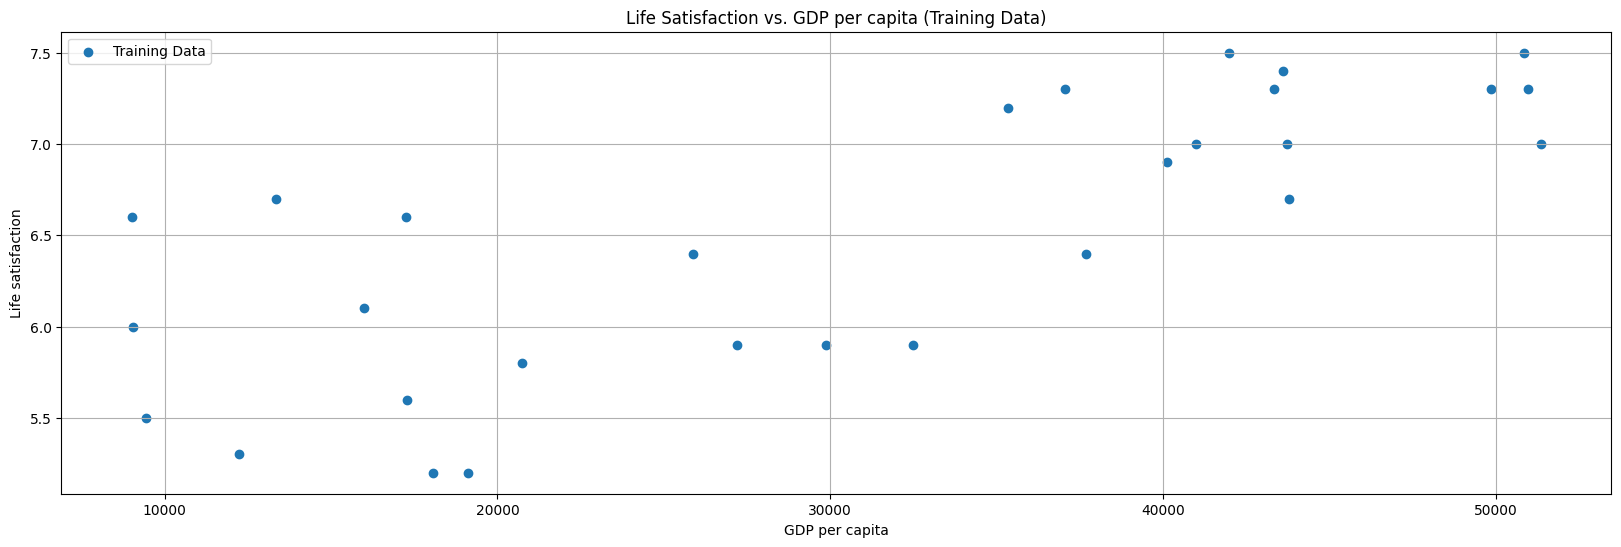

In [ ]:
# prompt: plot my dataset of train

# import matplotlib.pyplot as plt

# # Assuming 'train' DataFrame from the provided code is available

# # Create the plot
plt.figure(figsize=(20, 6))  # Adjust figure size if needed
plt.scatter(train["GDP per capita"], train["Life satisfaction"], label="Training Data")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.title("Life Satisfaction vs. GDP per capita (Training Data)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Lets create train and test dataset, so we can use train dataset for training the model
# and use test dataset to evaluate model performance
X_train = np.c_[train["GDP per capita"]]
y_train = np.c_[train["Life satisfaction"]]

X_test = np.c_[test["GDP per capita"]]
y_test = np.c_[test["Life satisfaction"]]

model = model.fit(X_train,y_train)

#Now apply the prediction on test dataset
y_pred_test = model.predict(X_test)

In [ ]:
# See predictions for yourself
y_pred_test

array([[5.51963264],
       [5.63673145],
       [5.78727828],
       [5.83148368],
       [7.34648781],
       [7.49174923],
       [8.24016457]])

In [ ]:
from sklearn.metrics import mean_squared_error

#MSE: Mean Squared Error as a metric to evaluate a regression model
mean_squared_error(y_test, y_pred_test)


0.3453255988992658

In [ ]:
#RMSE (Root Mean Square Error)
from math import sqrt
RMSE_1 = sqrt(mean_squared_error(y_test, y_pred_test))
display(RMSE_1)

0.5876441090483813

## Question:

# What would you expect if we normalize data and train the model again?

# Now, normalize data before prediction *italicized text*

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Define Scaling technique
scaler = MinMaxScaler()

In [ ]:
# Train escaling object
X_train_escaler = scaler.fit(X_train)

# Apply scaling model to the data
X_train_escaled = X_train_escaler.transform(X_train)
X_train_escaled[:5]

array([[0.        ],
       [0.00107767],
       [0.01011042],
       [0.07629898],
       [0.10230233]])

# Normalize Test Dataset

In [ ]:
# Apply scaling model to the data
X_test_escaled = X_train_escaler.transform(X_test)
X_test_escaled

array([[-0.07828521],
       [-0.00801295],
       [ 0.08233183],
       [ 0.10885997],
       [ 1.01803032],
       [ 1.10520327],
       [ 1.5543354 ]])

# Train Models using Scaled Data
# Start training the model using X and y

In [ ]:

model.fit(X_train_escaled, y_train)

y_pred_escaled = model.predict(X_train_escaled)

# Do prediction on test data

In [ ]:
y_pred_escaled = model.predict(X_test_escaled)

#Calculating error on model with normalized data

In [ ]:
#RMSE
from math import sqrt
RMSE_2 = sqrt(mean_squared_error(y_test, y_pred_escaled))
display(RMSE_2)

0.5876441090483813

#Comparing two RMSEs

In [ ]:
greater_rmse = max(RMSE_1, RMSE_2)
print(f"The greater RMSE is: {greater_rmse}") #RMSE_2 is greater

The greater RMSE is: 0.5876441090483813


*Normalization led to a slightly higher RMSE, suggesting that it did not significantly improve model performance and may not be necessary in this case*